In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
# import pandas lib as pd
import pandas as pd
 
# read by default 1st sheet of an excel file
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Testing FNH dataset/RandomOverSampler_withFeatures.xlsx', 'Sheet1')
 
print(df)
df = df.fillna(' ')
#df.dropna(inplace = True)
df.count()
input_array=np.array(df['Content'])

                                                   Title    Len  \
0      White house asks congress for funding on afgha...   3192   
1      Fear of ebola as congolese caught crossing us-...   1315   
2      Sunday screening: better brain health: we are ...   1095   
3                                Trump's weird fed tweet  14123   
4      States pushing back january enrollment deadlin...    233   
...                                                  ...    ...   
14860  Worrying new coronavirus variants aren't just ...  10096   
14861  Lawmakers respond to industry outcry with flex...   1085   
14862  Senate dems to try to stop doj's funding for o...   1914   
14863  Tn primary heats up: name calling and attack a...   2798   
14864  Many considering getting a shingle shot opting...    118   

                                                 Content  \
0      President joe biden's aides on tuesday asked c...   
1      A public health official in laredo, texas, sai...   
2      It appea

In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 14865):
    review = re.sub('[^a-zA-Z]', ' ', input_array[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [6]:
column = ['Len', 'Source','Title']
df = df.drop(columns=column)

In [7]:
df


,Content,Smog,TTR,Label
0,President joe biden's aides on tuesday asked c...,13.6,51.428571,0
1,"A public health official in laredo, texas, sai...",10.8,62.895928,1
2,It appears we really are what we eat. “neuro-n...,15.0,69.886364,1
3,Important piece from politico’s zachary warmbr...,14.6,41.971113,0
4,the pro health feature that tracks what the st...,7.8,84.090909,0
...,...,...,...,...
14860,The 45-year-old patient had been sick with cor...,11.9,35.138249,0
14861,an incentive program that worked like an incen...,12.8,67.403315,0
14862,Senate democrats are going back on offense on ...,12.4,53.271028,0
14863,"Manny sethi is winning. ” sethi, in the ad, a...",12.4,52.542373,1


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 15000)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[0:14865, 3].values

print(len(X))
print(len(y))

14865
14865


In [9]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# Spliting data - withom random shuffle
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(y_test,"\n",X_test)

[0 1 0 ... 0 1 0] 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Decision Tree**

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)

# Predicting the Test set results
y_predD = classifier2.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_predD)

print(cm2)

[[1365  187]
 [  14 1407]]


In [12]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_D = metrics.accuracy_score(y_test, y_predD)
Precision_D = metrics.precision_score(y_test, y_predD)
Sensitivity_recall_D = metrics.recall_score(y_test, y_predD)
Specificity_D = metrics.recall_score(y_test, y_predD, pos_label=0)
F1_score_D = metrics.f1_score(y_test, y_predD)

print("Accuracy of Model - Decision Tree =", Accuracy_D)
print("Precision of Model - Decision Tree =", Precision_D)
print("Sensitivity_recall of Model - Decision Tree =", Sensitivity_recall_D)
print("Specificity of Model - Decision Tree =", Specificity_D)
print("F1_score of Model - Decision Tree =", F1_score_D)


Accuracy of Model - Decision Tree = 0.9323915237134208
Precision of Model - Decision Tree = 0.882685069008783
Sensitivity_recall of Model - Decision Tree = 0.9901477832512315
Specificity of Model - Decision Tree = 0.8795103092783505
F1_score of Model - Decision Tree = 0.9333333333333335


**Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

# Predicting the Test set results
y_predR = classifier3.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_predR)


print(cm3)

[[1466   86]
 [  11 1410]]


In [14]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_R = metrics.accuracy_score(y_test, y_predR)
Precision_R = metrics.precision_score(y_test, y_predR)
Sensitivity_recall_R = metrics.recall_score(y_test, y_predR)
Specificity_R = metrics.recall_score(y_test, y_predR, pos_label=0)
F1_score_R = metrics.f1_score(y_test, y_predR)

print("Accuracy of Model - Random Forest =", Accuracy_R)
print("Precision of Model - Random Forest =", Precision_R)
print("Sensitivity_recall of Model - Random Forest =", Sensitivity_recall_R)
print("Specificity of Model - Random Forest =", Specificity_R)
print("F1_score of Model - Random Forest =", F1_score_R)

Accuracy of Model - Random Forest = 0.9673730238816011
Precision of Model - Random Forest = 0.9425133689839572
Sensitivity_recall of Model - Random Forest = 0.9922589725545391
Specificity of Model - Random Forest = 0.9445876288659794
F1_score of Model - Random Forest = 0.9667466575248543


**SVM**

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_predSVM = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_predSVM)

print(cm5)

[[1378  174]
 [   0 1421]]


In [16]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_SVM = metrics.accuracy_score(y_test, y_predSVM)
Precision_SVM = metrics.precision_score(y_test, y_predSVM)
Sensitivity_recall_SVM = metrics.recall_score(y_test, y_predSVM)
Specificity_SVM = metrics.recall_score(y_test, y_predSVM, pos_label=0)
F1_score_SVM = metrics.f1_score(y_test, y_predSVM)

print("Accuracy of Model - SVM =", Accuracy_SVM)
print("Precision of Model - SVM =", Precision_SVM)
print("Sensitivity_recall of Model - SVM =", Sensitivity_recall_SVM)
print("Specificity of Model - SVM =", Specificity_SVM)
print("F1_score of Model - SVM =", F1_score_SVM)

Accuracy of Model - SVM = 0.941473259334006
Precision of Model - SVM = 0.8909090909090909
Sensitivity_recall of Model - SVM = 1.0
Specificity of Model - SVM = 0.8878865979381443
F1_score of Model - SVM = 0.9423076923076923


**Ada Boost with Decision Tree**

In [17]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_clf_D = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
adaboost_clf_D.fit(X_train, y_train)


y_predAD = adaboost_clf_D.predict(X_test)

In [18]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_AD = metrics.accuracy_score(y_test, y_predAD)
Precision_AD = metrics.precision_score(y_test, y_predAD)
Sensitivity_recall_AD = metrics.recall_score(y_test, y_predAD)
Specificity_AD = metrics.recall_score(y_test, y_predAD, pos_label=0)
F1_score_AD = metrics.f1_score(y_test, y_predAD)

print("Accuracy of Model - Ada Boost =", Accuracy_AD)
print("Precision of Model - Ada Boost =", Precision_AD)
print("Sensitivity_recall of Model - Ada Boost =", Sensitivity_recall_AD)
print("Specificity of Model - Ada Boost =", Specificity_AD)
print("F1_score of Model - Ada Boost =", F1_score_AD)

Accuracy of Model - Ada Boost = 0.8832828792465524
Precision of Model - Ada Boost = 0.8420382165605096
Sensitivity_recall of Model - Ada Boost = 0.9303307529908516
Specificity of Model - Ada Boost = 0.8402061855670103
F1_score of Model - Ada Boost = 0.8839852892009361


**Ada Boost with Random forest**

In [19]:
adaboost_clf_RF = AdaBoostClassifier(
    RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0))
adaboost_clf_RF.fit(X_train, y_train)

y_predAR = adaboost_clf_RF.predict(X_test)

In [20]:
# Precision, recall, accuracy score and F1 score

from sklearn import metrics
Accuracy_ARF = metrics.accuracy_score(y_test, y_predAR)
Precision_ARF = metrics.precision_score(y_test, y_predAR)
Sensitivity_recall_ARF = metrics.recall_score(y_test, y_predAR)
Specificity_ARF = metrics.recall_score(y_test, y_predAR, pos_label=0)
F1_score_ARF = metrics.f1_score(y_test, y_predAR)

print("Accuracy of Model - Ada Boost_RF =", Accuracy_ARF)
print("Precision of Model - Ada Boost_RF =", Precision_ARF)
print("Sensitivity_recall of Model - Ada Boost_RF =", Sensitivity_recall_ARF)
print("Specificity of Model - Ada Boost_RF =", Specificity_ARF)
print("F1_score of Model - Ada Boost_RF =", F1_score_ARF)

Accuracy of Model - Ada Boost_RF = 0.9902455432223344
Precision of Model - Ada Boost_RF = 0.989451476793249
Sensitivity_recall of Model - Ada Boost_RF = 0.9901477832512315
Specificity of Model - Ada Boost_RF = 0.9903350515463918
F1_score of Model - Ada Boost_RF = 0.9897995075624341


**COMPARISION**

Text(0.5, 1.0, 'Accuracy across different Models')

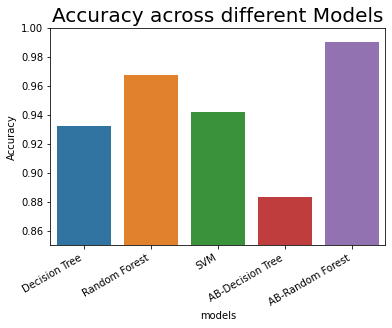

In [22]:
# Model Prediction Plots Together - Accuracy
import seaborn as sns
import matplotlib.pyplot as plt

models =['Decision Tree','Random Forest','SVM','AB-Decision Tree', 'AB-Random Forest']
Accuracy_Scores=[Accuracy_D, Accuracy_R, Accuracy_SVM, Accuracy_AD, Accuracy_ARF]


df = pd.DataFrame({"models": models, "Accuracy": Accuracy_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Accuracy", data=df)

plt.xticks(rotation=30, ha='right')
plt.ylim(0.85, 1)
plt.title('Accuracy across different Models',fontsize=20)

Text(0.5, 1.0, 'Precision across different Models')

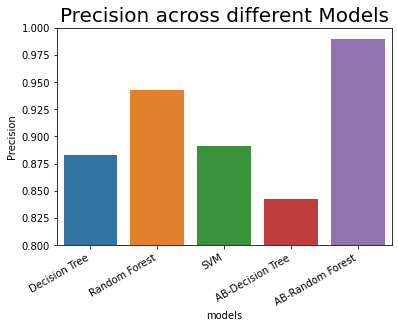

In [23]:
# Model Prediction Plots Together - Precision
import matplotlib.pyplot as plt

models =['Decision Tree','Random Forest','SVM','AB-Decision Tree', 'AB-Random Forest']
Precision_Scores=[Precision_D, Precision_R, Precision_SVM, Precision_AD, Precision_ARF]

df = pd.DataFrame({"models": models, "Precision": Precision_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Precision", data=df)
plt.xticks( rotation=30, ha='right')
plt.ylim(0.8, 1)

plt.title('Precision across different Models',fontsize=20)

Text(0.5, 1.0, 'Sensitivity across different Models')

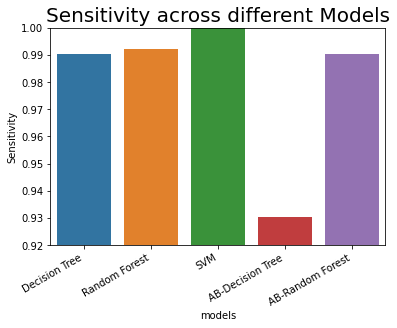

In [24]:
# Model Prediction Plots Together - Recall
import matplotlib.pyplot as plt
import seaborn as sns

models =['Decision Tree','Random Forest','SVM','AB-Decision Tree', 'AB-Random Forest']
Sensitivity_recall_Scores=[Sensitivity_recall_D, Sensitivity_recall_R, Sensitivity_recall_SVM, Sensitivity_recall_AD, Sensitivity_recall_ARF]

df = pd.DataFrame({"models": models, "Sensitivity": Sensitivity_recall_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="Sensitivity", data=df)

plt.ylim(0.92, 1)
plt.xticks( rotation=30, ha='right')
plt.title('Sensitivity across different Models',fontsize=20)

Text(0.5, 1.0, 'F1_score across different Models')

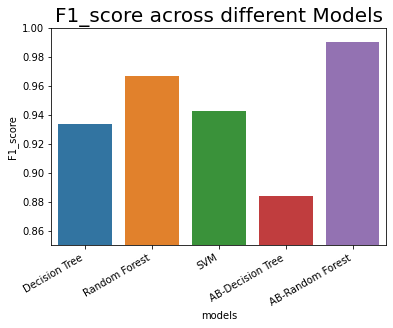

In [25]:
# Model Prediction Plots Together - F1 Score
import matplotlib.pyplot as plt
import seaborn as sns
models =['Decision Tree','Random Forest','SVM','AB-Decision Tree', 'AB-Random Forest']

F1_score_Scores=[F1_score_D, F1_score_R, F1_score_SVM, F1_score_AD, F1_score_ARF]
df = pd.DataFrame({"models": models, "F1_score": F1_score_Scores})

# make barplot and sort bars
sns.barplot(x="models",
            y="F1_score", data=df)

plt.ylim(0.85, 1)
plt.xticks(rotation=30, ha='right')
plt.title('F1_score across different Models',fontsize=20)
